In [2]:
from matplotlib import pyplot as plt
import os 
import json
import numpy as np
from collections import defaultdict


# **Utils**

In [3]:
def charger_donnees(fichier, seuil):
    """Charge les données d'un fichier JSON et filtre selon un seuil."""
    with open(fichier, 'r') as file:
        data = json.load(file)
    
    px = []
    py = []
    for key in data.keys():
        for i, resultat in enumerate(data[key]["resultats"]):
            if resultat > seuil:
                px.append(data[key]["couche copiees"])
                py.append(resultat)
    return px, py



In [4]:
def calculer_moyennes(px, py):
    """Calcule les moyennes des valeurs py en fonction des indices px."""
    groupes = defaultdict(list)
    for x, y in zip(px, py):
        groupes[x].append(y)
    moyennes = {x: sum(vals) / len(vals) for x, vals in groupes.items()}
    return moyennes

# **MNIST**

## **Résultats brut**


In [15]:
seuil = 0

bnbpx, bnbpy = charger_donnees("./resultats/BNB+.json", seuil)

anbpx, anbpy = charger_donnees("./resultats/ANB+.json", seuil)

anbx, anby = charger_donnees("./resultats/ANB.json", seuil)

bnbx, bnby = charger_donnees("./resultats/BNB.json", seuil)


with open("./resultats/base.json",'r') as file :
    data = json.load(file)
baseay = data["model A"]
baseby = data["model B"]
baseax = np.zeros(len(baseay))
basebx = np.zeros(len(baseby))
# print(len(baseby), len(basebx))

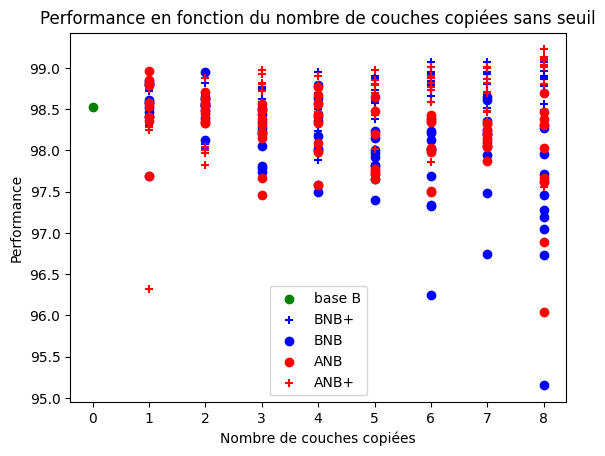

In [69]:
plt.scatter(basebx, baseby, marker='o', color="green", label="base B")
plt.scatter(bnbpx, bnbpy, marker='+', color="blue", label="BNB+")
plt.scatter(bnbx, bnby, marker='o', color='blue', label = "BNB")
plt.scatter(anbx, anby, marker='o', color='red', label = "ANB")
plt.scatter(anbpx, anbpy, marker='+', color="red", label = "ANB+" )
plt.legend()
plt.title(f"Performance en fonction du nombre de couches copiées sans seuil")
plt.ylabel("Performance")
plt.xlabel("Nombre de couches copiées")
plt.show()

## **Résultats avec valeurs extrêmes filtrées**

In [61]:
seuil = 95

bnbpx, bnbpy = charger_donnees("./resultats/BNB+.json", seuil)

anbpx, anbpy = charger_donnees("./resultats/ANB+.json", seuil)

anbx, anby = charger_donnees("./resultats/ANB.json", seuil)

bnbx, bnby = charger_donnees("./resultats/BNB.json", seuil)


with open("./resultats/base.json",'r') as file :
    data = json.load(file)
baseay = data["model A"]
baseby = data["model B"]
baseax = np.zeros(len(baseay))
basebx = np.zeros(len(baseby))

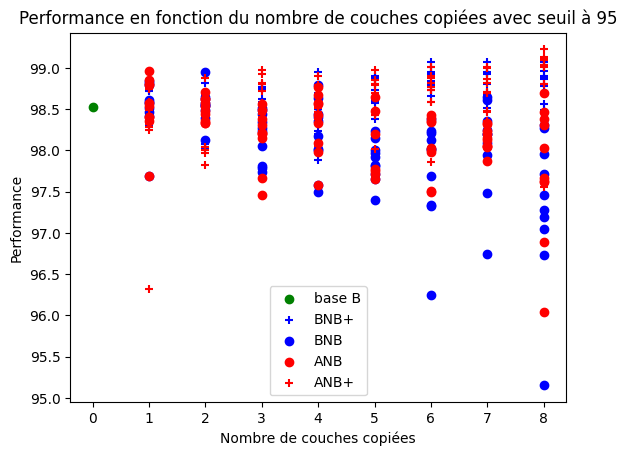

In [68]:
plt.scatter(basebx, baseby, marker='o', color="green", label="base B")
plt.scatter(bnbpx, bnbpy, marker='+', color="blue", label="BNB+")
plt.scatter(bnbx, bnby, marker='o', color='blue', label = "BNB")
plt.scatter(anbx, anby, marker='o', color='red', label = "ANB")
plt.scatter(anbpx, anbpy, marker='+', color="red", label = "ANB+" )
plt.legend()
plt.title(f"Performance en fonction du nombre de couches copiées avec seuil à {seuil}")
plt.ylabel("Performance")
plt.xlabel("Nombre de couches copiées")
plt.show()

## **Affichage des points moyens**

In [16]:


seuil = 95

bnbpx, bnbpy = charger_donnees("./resultats/BNB+.json", seuil)
bnbp_moyennes = calculer_moyennes(bnbpx, bnbpy)

anbpx, anbpy = charger_donnees("./resultats/ANB+.json", seuil)
anbp_moyennes = calculer_moyennes(anbpx, anbpy)

anbx, anby = charger_donnees("./resultats/ANB.json", seuil)
anb_moyennes = calculer_moyennes(anbx, anby)

bnbx, bnby = charger_donnees("./resultats/BNB.json", seuil)
bnb_moyennes = calculer_moyennes(bnbx, bnby)


with open("./resultats/base.json", 'r') as file:
    data = json.load(file)

# baseay = [np.array(data["model A"]).mean()]
baseby = [np.array(data["model B"]).mean()]
# baseax = np.zeros(len(baseay))
basebx = np.zeros(len(baseby))


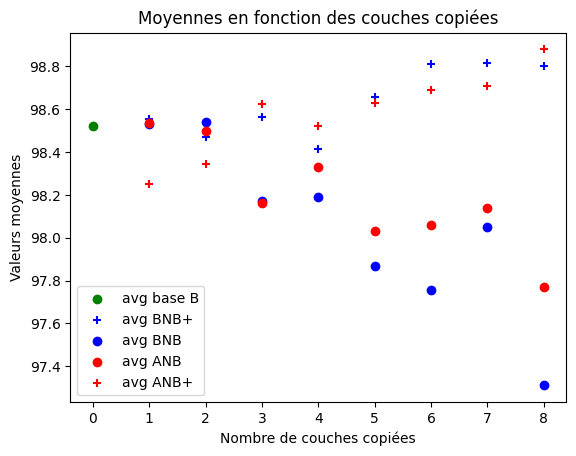

In [66]:
plt.scatter(basebx, baseby, marker='o', color="green", label="avg base B")
plt.scatter(list(bnbp_moyennes.keys()), list(bnbp_moyennes.values()), marker='+', color="blue", label="avg BNB+")
plt.scatter(list(bnb_moyennes.keys()), list(bnb_moyennes.values()), marker='o', color='blue', label = "avg BNB")
plt.scatter(list(anb_moyennes.keys()), list(anb_moyennes.values()), marker='o', color='red', label = "avg ANB")
plt.scatter(list(anbp_moyennes.keys()), list(anbp_moyennes.values()), marker='+', color="red", label = "avg ANB+" )
plt.legend()
plt.title("Moyennes en fonction des couches copiées")
plt.ylabel("Valeurs moyennes")
plt.xlabel("Nombre de couches copiées")
plt.show()

### **Courbes**

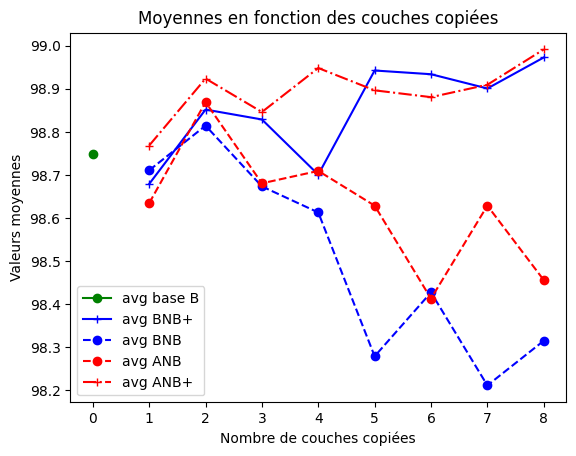

In [17]:

plt.plot(basebx, baseby, marker='o', color="green", label="avg base B", linestyle='-')
plt.plot(list(bnbp_moyennes.keys()), list(bnbp_moyennes.values()), marker='+', color="blue", label="avg BNB+", linestyle='-')
plt.plot(list(bnb_moyennes.keys()), list(bnb_moyennes.values()), marker='o', color='blue', label="avg BNB", linestyle='--')
plt.plot(list(anb_moyennes.keys()), list(anb_moyennes.values()), marker='o', color='red', label="avg ANB", linestyle='--')
plt.plot(list(anbp_moyennes.keys()), list(anbp_moyennes.values()), marker='+', color="red", label="avg ANB+", linestyle='-.')


plt.legend()
plt.title("Moyennes en fonction des couches copiées")
plt.ylabel("Valeurs moyennes")
plt.xlabel("Nombre de couches copiées")
plt.show()

# **CIFAR**

In [12]:
seuil = 0

bnbpx, bnbpy = charger_donnees("./resultats_cifar/BNB+.json", seuil)

anbpx, anbpy = charger_donnees("./resultats_cifar/ANB+.json", seuil)

anbx, anby = charger_donnees("./resultats_cifar/ANB.json", seuil)

bnbx, bnby = charger_donnees("./resultats_cifar/BNB.json", seuil)


with open("./resultats_cifar/base.json",'r') as file :
    data = json.load(file)
baseay = data["model A"]
baseby = data["model B"]
baseax = np.zeros(len(baseay))
basebx = np.zeros(len(baseby))
# print(len(baseby), len(basebx))

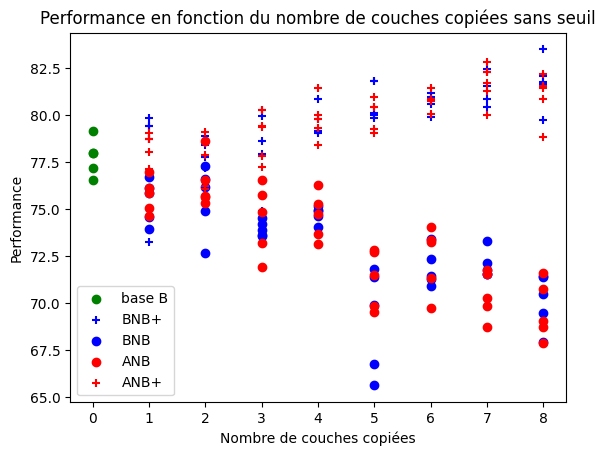

In [13]:
plt.scatter(basebx, baseby, marker='o', color="green", label="base B")
plt.scatter(bnbpx, bnbpy, marker='+', color="blue", label="BNB+")
plt.scatter(bnbx, bnby, marker='o', color='blue', label = "BNB")
plt.scatter(anbx, anby, marker='o', color='red', label = "ANB")
plt.scatter(anbpx, anbpy, marker='+', color="red", label = "ANB+" )
plt.legend()
plt.title(f"Performance en fonction du nombre de couches copiées sans seuil")
plt.ylabel("Performance")
plt.xlabel("Nombre de couches copiées")
plt.show()